In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.feature_extraction.text import TfidfVectorizer

In [57]:
book_reviews_pd = pd.read_csv("final.csv")
data = book_reviews_pd['clean_summary']

In [58]:
tf_idf_vectorizor = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)

# print(tf_idf_vectorizor)
tf_idf = tf_idf_vectorizor.fit_transform(data)
tf_idf_norm = normalize(tf_idf)
tf_idf_array = tf_idf_norm.toarray()

In [60]:
genre = book_reviews_pd['clean_categories']

tf_idf_vectorizor_g = TfidfVectorizer(stop_words = 'english',#tokenizer = tokenize_and_stem,
                             max_features = 20000)

# print(tf_idf_vectorizor_g)

tf_idf_g = tf_idf_vectorizor_g.fit_transform(genre)
tf_idf_norm_g = normalize(tf_idf_g)
tf_idf_array_g = tf_idf_norm_g.toarray()

In [16]:
print(tf_idf_array_g)

[[0.         0.         0.         ... 1.         0.         0.        ]
 [0.         0.         0.70710678 ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]]


In [36]:
print(tf_idf_array_g[3])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [26]:
print(tf_idf_array_g[96])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [27]:
print(tf_idf_array_g[98])

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


In [29]:
print(tf_idf_array_g[15])

[0.         0.         0.70710678 0.70710678 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [37]:
print(genre)

0                    religion
1     biography autobiography
2                     history
3                     fiction
4                   education
               ...           
95                      humor
96                    fiction
97                    history
98                    fiction
99                electronics
Name: clean_categories, Length: 100, dtype: object


In [22]:
print(tf_idf_array_g[1])

[0.         0.         0.70710678 0.70710678 0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]


In [61]:
comb_arr = []
for i in range(len(tf_idf_array)):
    # print(len(tf_idf_array[i]))
    # index = [item for item in enumerate(tf_idf_array_g[i]) if item>0]
    index = next((i for i, x in enumerate(tf_idf_array_g[i]) if x), None)
    # item = tf_idf_array_g[i].index()
    comb_arr.append([sum(tf_idf_array[i]), index])

In [54]:
print(type(comb_arr))

<class 'list'>


In [14]:
print(tf_idf_array)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [62]:
sklearn_pca = PCA(n_components = 2)
Y_sklearn = sklearn_pca.fit_transform(tf_idf_array)
kmeans = KMeans(n_clusters=3, max_iter=600, algorithm = 'lloyd')
fitted = kmeans.fit(Y_sklearn)
prediction = kmeans.predict(Y_sklearn)

In [93]:
print(Y_sklearn.shape)

(41406, 2)


In [95]:
kmeans2 = KMeans(n_clusters= 10)
label = kmeans2.fit_predict(Y_sklearn)
filtered_label0 = Y_sklearn[label == 0]

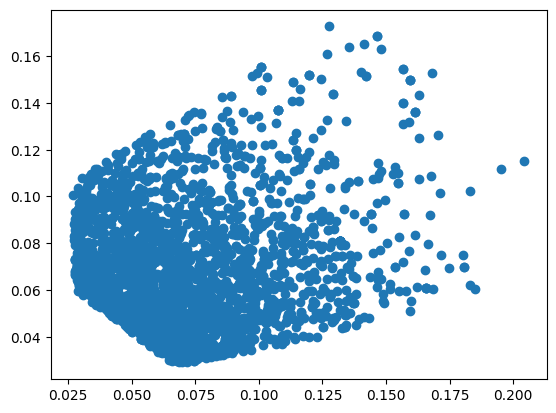

In [96]:
plt.scatter(filtered_label0[:,0] , filtered_label0[:,1])
plt.show()

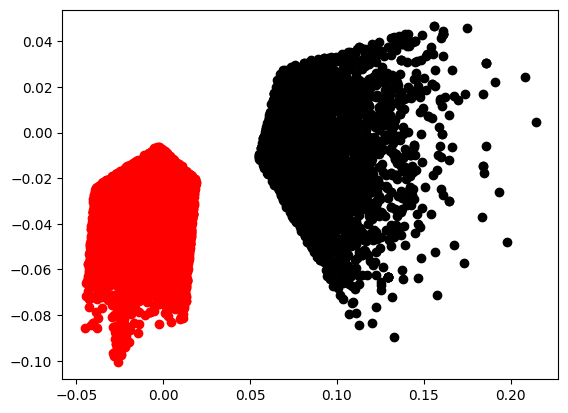

In [97]:
filtered_label2 = Y_sklearn[label == 2]
 
filtered_label8 = Y_sklearn[label == 8]
 
#Plotting the results
plt.scatter(filtered_label2[:,0] , filtered_label2[:,1] , color = 'red')
plt.scatter(filtered_label8[:,0] , filtered_label8[:,1] , color = 'black')
plt.show()

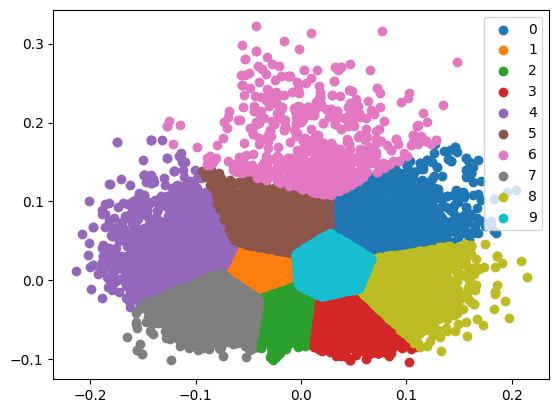

In [98]:
u_labels = np.unique(label)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(Y_sklearn[label == i , 0] , Y_sklearn[label == i , 1] , label = i)
plt.legend()
plt.show()

In [63]:
def get_top_features_cluster(tf_idf_array, prediction, n_feats):
    labels = np.unique(prediction)
    dfs = []
    for label in labels:
        id_temp = np.where(prediction==label) # indices for each cluster
        x_means = np.mean(tf_idf_array[id_temp], axis = 0) # returns average score across cluster
        sorted_means = np.argsort(x_means)[::-1][:n_feats] # indices with top 20 scores
        features = tf_idf_vectorizor.get_feature_names_out()
        best_features = [(features[i], x_means[i]) for i in sorted_means]
        df = pd.DataFrame(best_features, columns = ['features', 'score'])
        dfs.append(df)
    return dfs
dfs = get_top_features_cluster(tf_idf_array, prediction, 15)

In [26]:
print(dfs[0])

   features     score
0      year  0.032809
1       man  0.028312
2      love  0.027149
3     story  0.026749
4      life  0.025161
5       old  0.024596
6     young  0.023478
7     death  0.021527
8     world  0.021109
9     tells  0.019796
10      new  0.019071
11   carter  0.018090
12     tale  0.017899
13     know  0.017232
14     book  0.016633


In [76]:
print(Y_sklearn)

[[-0.06555847  0.01962581]
 [ 0.03488902  0.00073193]
 [-0.05064694  0.03697889]
 ...
 [ 0.11000909 -0.00747195]
 [ 0.06933943 -0.05466686]
 [ 0.02209134 -0.00908564]]


In [27]:
print(type(dfs[0]))

<class 'pandas.core.frame.DataFrame'>


In [11]:
print(tf_idf_array[:, 1])

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.22974441 0.         0.         0.        ]


In [70]:
comb_arr = []
lenny = len(tf_idf_array)
for i in range(lenny):
    # print(len(tf_idf_array[i]))
    # index = [item for item in enumerate(tf_idf_array_g[i]) if item>0]
    index = next((i for i, x in enumerate(tf_idf_array_g[i]) if x), None)
    summy = sum(tf_idf_array[i])
    # item = tf_idf_array_g[i].index()
    comb_arr.append([summy, index*summy/lenny])

In [71]:
comb_np = np.array(comb_arr)

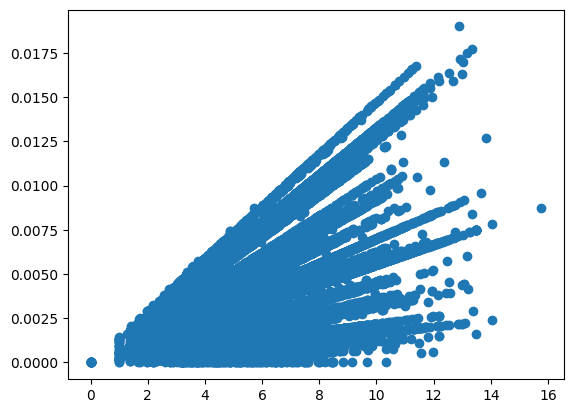

In [72]:
plt.scatter(comb_np[:, 0], comb_np[:, 1])
# plt.title(f"{file}")
plt.show()

In [53]:
print(comb_arr[:, 0])

TypeError: list indices must be integers or slices, not tuple

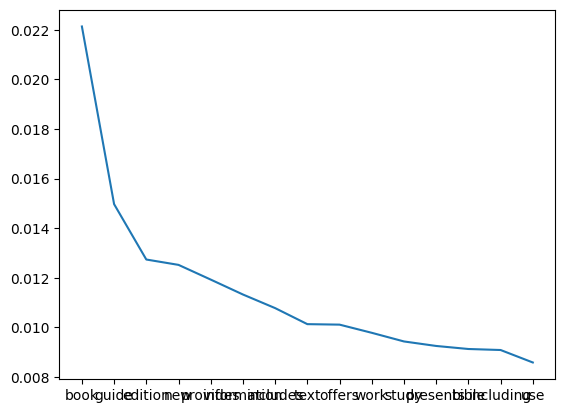

In [73]:
# fig, axs = plt.subplots(3)
# fig.suptitle('Graphs')
plt.plot(dfs[0]['features'], dfs[0]['score'])
# plt.xlabel('Number of Clusters')
# plt.ylabel('Score')
# plt.title('Elbow Method')
plt.show()

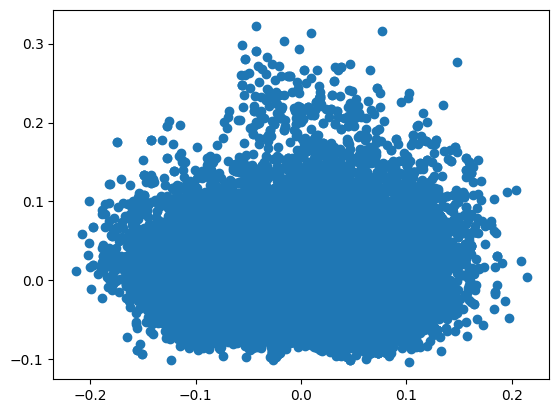

In [77]:
plt.scatter(Y_sklearn[:, 0], Y_sklearn[:, 1])
# plt.title(f"{file}")
plt.show()

In [79]:
sklearn_pca_g = PCA(n_components = 2)
Y_sklearn_g = sklearn_pca_g.fit_transform(tf_idf_array_g)
kmeans_g = KMeans(n_clusters=3, max_iter=600, algorithm = 'lloyd')
fitted_g = kmeans_g.fit(Y_sklearn_g)
prediction_g = kmeans_g.predict(Y_sklearn_g)

In [84]:
print(type(fitted_g))

<class 'sklearn.cluster._kmeans.KMeans'>


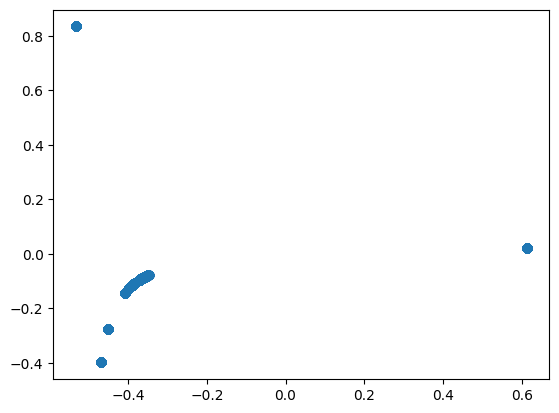

In [81]:
plt.scatter(Y_sklearn_g[:, 0], Y_sklearn_g[:, 1])
# plt.title(f"{file}")
plt.show()

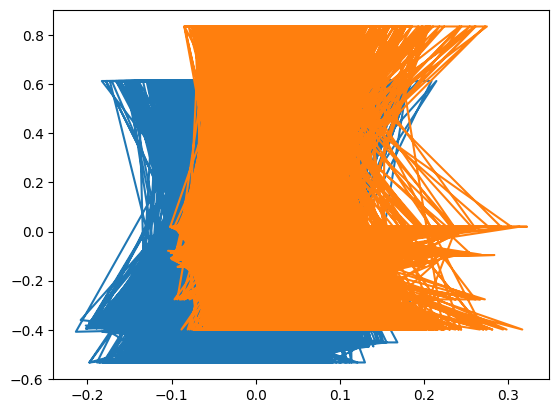

In [85]:
plt.plot(Y_sklearn, Y_sklearn_g)
plt.show()

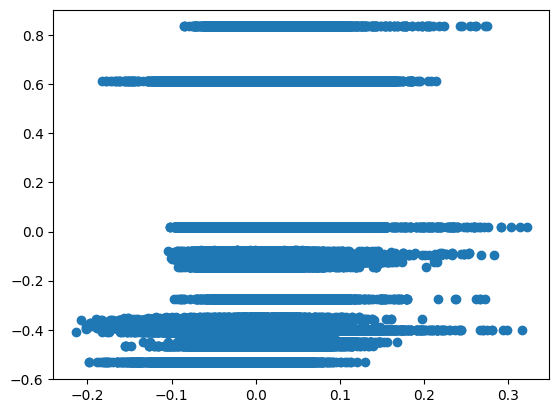

In [86]:
plt.scatter(Y_sklearn, Y_sklearn_g)
# plt.title(f"{file}")
plt.show()

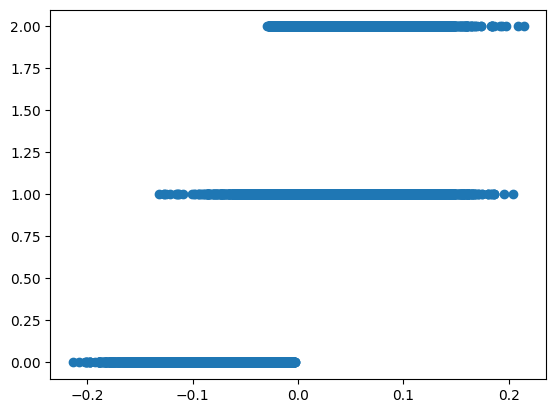

In [88]:
plt.scatter(Y_sklearn[:, 0], prediction)
# plt.title(f"{file}")
plt.show()

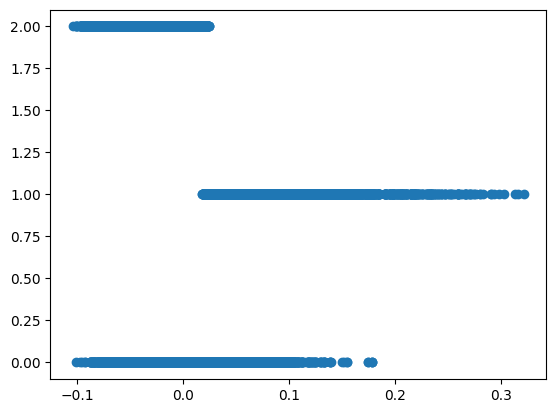

In [89]:
plt.scatter(Y_sklearn[:, 1], prediction)
# plt.title(f"{file}")
plt.show()

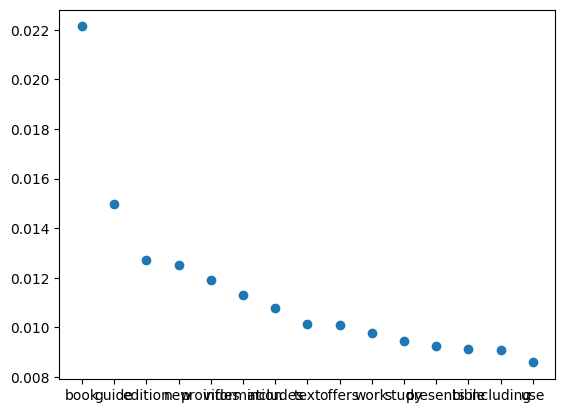

In [91]:
plt.scatter(dfs[0]['features'], dfs[0]['score'])
plt.show()

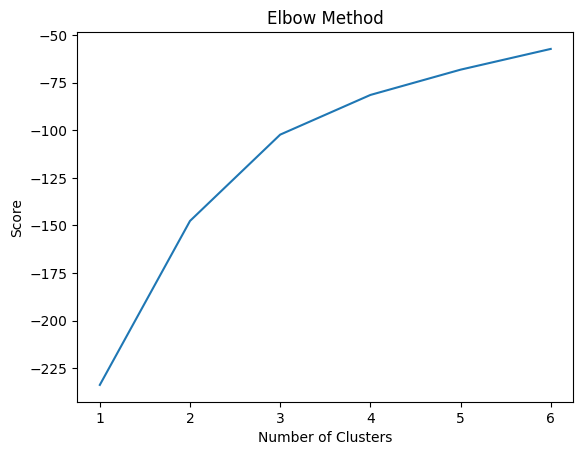

In [90]:
number_clusters = range(1, 7)

kmeans = [KMeans(n_clusters=i, max_iter = 600) for i in number_clusters]
# kmeans

score = [kmeans[i].fit(Y_sklearn).score(Y_sklearn) for i in range(len(kmeans))]
# score

plt.plot(number_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Elbow Method')
plt.show()

In [99]:
kmeans2 = KMeans(n_clusters= 10)
label_g = kmeans2.fit_predict(Y_sklearn_g)
filtered_label0_g = Y_sklearn_g[label == 0]

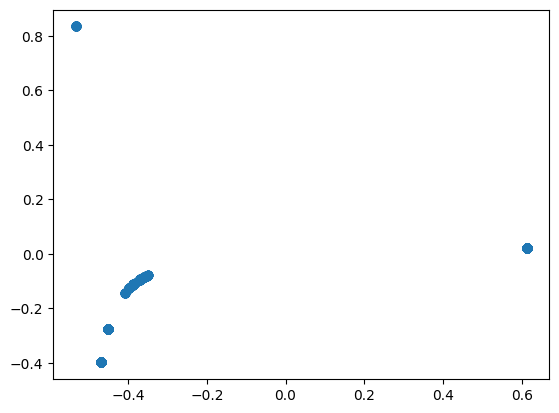

In [100]:
plt.scatter(filtered_label0_g[:,0] , filtered_label0_g[:,1])
plt.show()

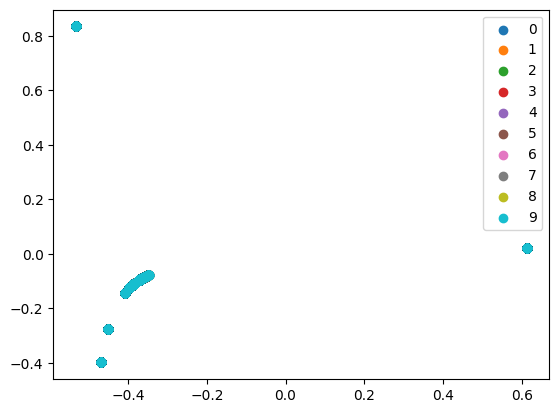

In [102]:
u_labels = np.unique(label_g)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(Y_sklearn_g[label == i , 0] , Y_sklearn_g[label == i , 1] , label = i)
plt.legend()
plt.show()

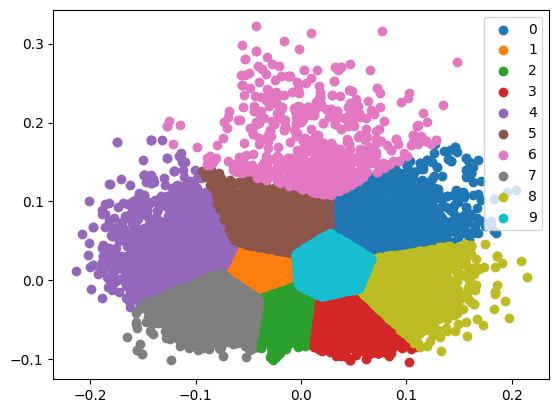

In [105]:
u_labels = np.unique(label_g)
 
#plotting the results:
 
for i in u_labels:
    plt.scatter(Y_sklearn[label == i , 0] , Y_sklearn[label == i , 1] , label = i)
plt.legend()
plt.show()